## part1. 문제 정의: 연구 질문이나 가설을 명확히 정의


이 `bank.csv` 데이터에는 총 21개의 열이 있으며, 은행의 마케팅 캠페인 관련 데이터를 담고 있습니다. 각 변수의 의미는 다음과 같습니다:

| Column           | Description                                                                                     | Data Type |
|------------------|-------------------------------------------------------------------------------------------------|-----------|
| **age**          | 고객의 나이                                                                                     | int64     |
| **job**          | 고객의 직업 유형                                                                                 | object    |
| **marital**      | 고객의 결혼 상태 (예: 결혼, 미혼, 이혼)                                                           | object    |
| **education**    | 고객의 교육 수준 (예: 초등, 중등, 고등, 대학교육)                                                 | object    |
| **default**      | 고객의 신용 기본 여부 ('yes' 또는 'no')                                                          | object    |
| **housing**      | 고객의 주택 대출 여부 ('yes' 또는 'no')                                                          | object    |
| **loan**         | 고객의 개인 대출 여부 ('yes' 또는 'no')                                                          | object    |
| **contact**      | 마케팅 연락 방법 (예: 휴대전화, 유선전화)                                                         | object    |
| **month**        | 가장 최근에 마케팅 캠페인을 한 월 (예: 'jan', 'feb' 등)                                           | object    |
| **day_of_week**  | 마케팅 연락이 이루어진 요일 (예: 'mon', 'tue' 등)                                                 | object    |
| **duration**     | 현재 캠페인에서 고객과의 마지막 연락 시간 (초 단위)                                               | int64     |
| **campaign**     | 현재 캠페인에서 고객과의 총 연락 횟수                                                            | int64     |
| **pdays**        | 이전 캠페인에서 마지막으로 고객에게 연락한 후 지난 일 수 (999는 해당 없음)                         | int64     |
| **previous**     | 이전 캠페인에서 고객과의 총 연락 횟수                                                            | int64     |
| **poutcome**     | 이전 캠페인 결과 (예: 성공, 실패, 기타, 없음)                                                     | object    |
| **emp_var_rate** | 고용 변동률 (경제적 상황을 나타냄)                                                               | float64   |
| **cons_price_idx** | 소비자 물가지수                                                                               | float64   |
| **cons_conf_idx**  | 소비자 신뢰 지수                                                                              | float64   |
| **euribor3m**    | 3개월 유리보 금리                                                                               | float64   |
| **nr_employed**  | 고용된 인원 수                                                                                   | float64   |
| **y**            | 목표 변수: 고객이 캠페인에 참여하여 예금을 가입했는지 여부 ('1'은 참여, '0'은 미참여)             | int64     | 


이 변수들은 캠페인의 결과와 연관된 요소들로, 고객의 인구통계적 정보, 경제적 지표, 마케팅 캠페인 관련 정보가 포함되어 있습니다.

In [4]:
import pandas as pd

# Load the data to review it and define potential research questions or hypotheses
file_path = '../Data/banking.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
def value_counts_with_percentage(df, column):

    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
    print(result)


value_counts_with_percentage(df,'y')

   Count  Percentage (%)
y                       
0  36548           88.73
1   4640           11.27


In [13]:
tmp = df[['marital', 'duration', 'campaign', 'y']]    # 일단 실수형 데이터만 뽑아봄. y값과 연관성을 봐야하니, y값도 같이 넣는다
tmp.head()

,marital,duration,campaign,y
0,married,210,1,0
1,married,138,1,0
2,single,339,3,1
3,married,185,2,0
4,married,137,1,1


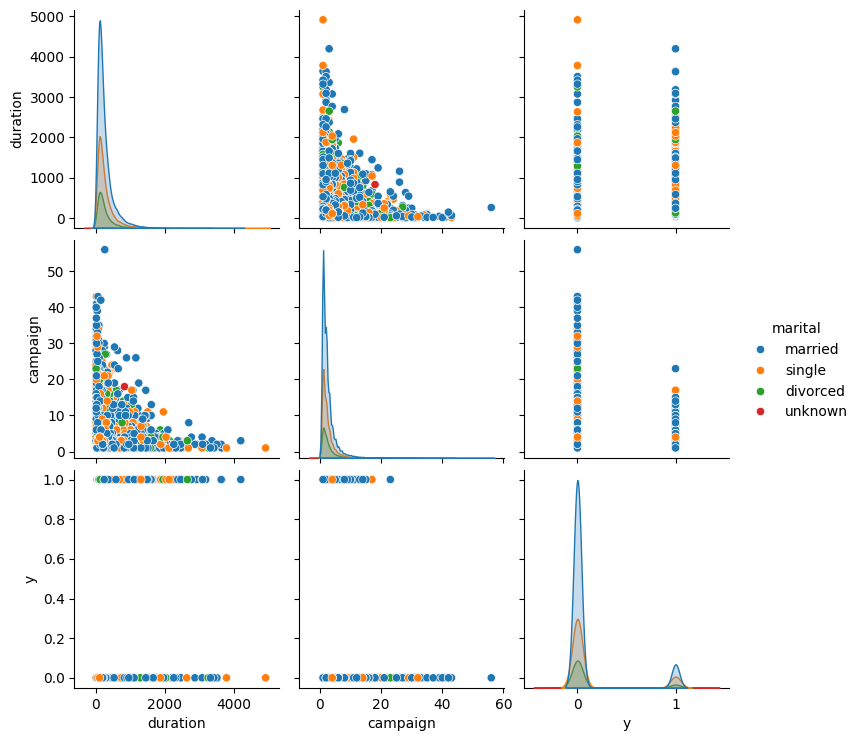

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tmp, hue='marital')

In [21]:
tmp_y0 = tmp[tmp['y']==0]
tmp_y0_counts = tmp_y0['marital'].value_counts()

dic_y0 = {
    'title': tmp_y0_counts.index,
    'count': tmp_y0_counts,
    'ratio': tmp_y0_counts / tmp_y0_counts.sum() * 100
}

tmp_y1 = tmp[tmp['y']==1]
tmp_y1_counts = tmp_y1['marital'].value_counts()

dic_y1 = {
    'title': tmp_y1_counts.index,
    'count': tmp_y1_counts,
    'ratio': tmp_y1_counts / tmp_y1_counts.sum() * 100
}

df_y0 = pd.DataFrame(dic_y0)
df_y1 = pd.DataFrame(dic_y1)

print(df_y0)
print(df_y1)

             title  count      ratio
marital                             
married    married  22396  61.278319
single      single   9948  27.219000
divorced  divorced   4136  11.316625
unknown    unknown     68   0.186057
             title  count      ratio
marital                             
married    married   2532  54.568966
single      single   1620  34.913793
divorced  divorced    476  10.258621
unknown    unknown     12   0.258621


ratio를 보면, married vs single의 비율은   
가입 안함(y=0) 61:27,   
가입 함(y=1) 54:34    -> 위아래 비율 차이가 별로 나지 않음  
한마디로 marital에 따라서 딱히 가입함/안함이 안나뉜다 => marital은 별로 의미있는 변수가 아니다

In [23]:
## 위 코드를 object 자료형 변수들을 대상으로 모두 해보자.
for col in df.columns:
    if df[col].dtype == 'object':
        for i in range(2):
            print(f'column name: {col}, y={i}')
            tmp = df[df['y']==i]
            tmp_counts = tmp[col].value_counts()

            dic = {
                'title': tmp_counts.index,
                'count': tmp_counts,
                'ratio': tmp_counts / tmp_counts.sum() * 100
            }

            df_tmp = pd.DataFrame(dic)
            print(df_tmp)
            print('\n')

column name: job, y=0
                       title  count      ratio
job                                           
admin.                admin.   9070  24.816679
blue-collar      blue-collar   8616  23.574477
technician        technician   6013  16.452337
services            services   3646   9.975922
management        management   2596   7.102988
entrepreneur    entrepreneur   1332   3.644522
retired              retired   1286   3.518660
self-employed  self-employed   1272   3.480355
housemaid          housemaid    954   2.610266
unemployed        unemployed    870   2.380431
student              student    600   1.641677
unknown              unknown    293   0.801685


column name: job, y=1
                       title  count      ratio
job                                           
admin.                admin.   1352  29.137931
technician        technician    730  15.732759
blue-collar      blue-collar    638  13.750000
retired              retired    434   9.353448
management    

<Figure size 1000x800 with 0 Axes>

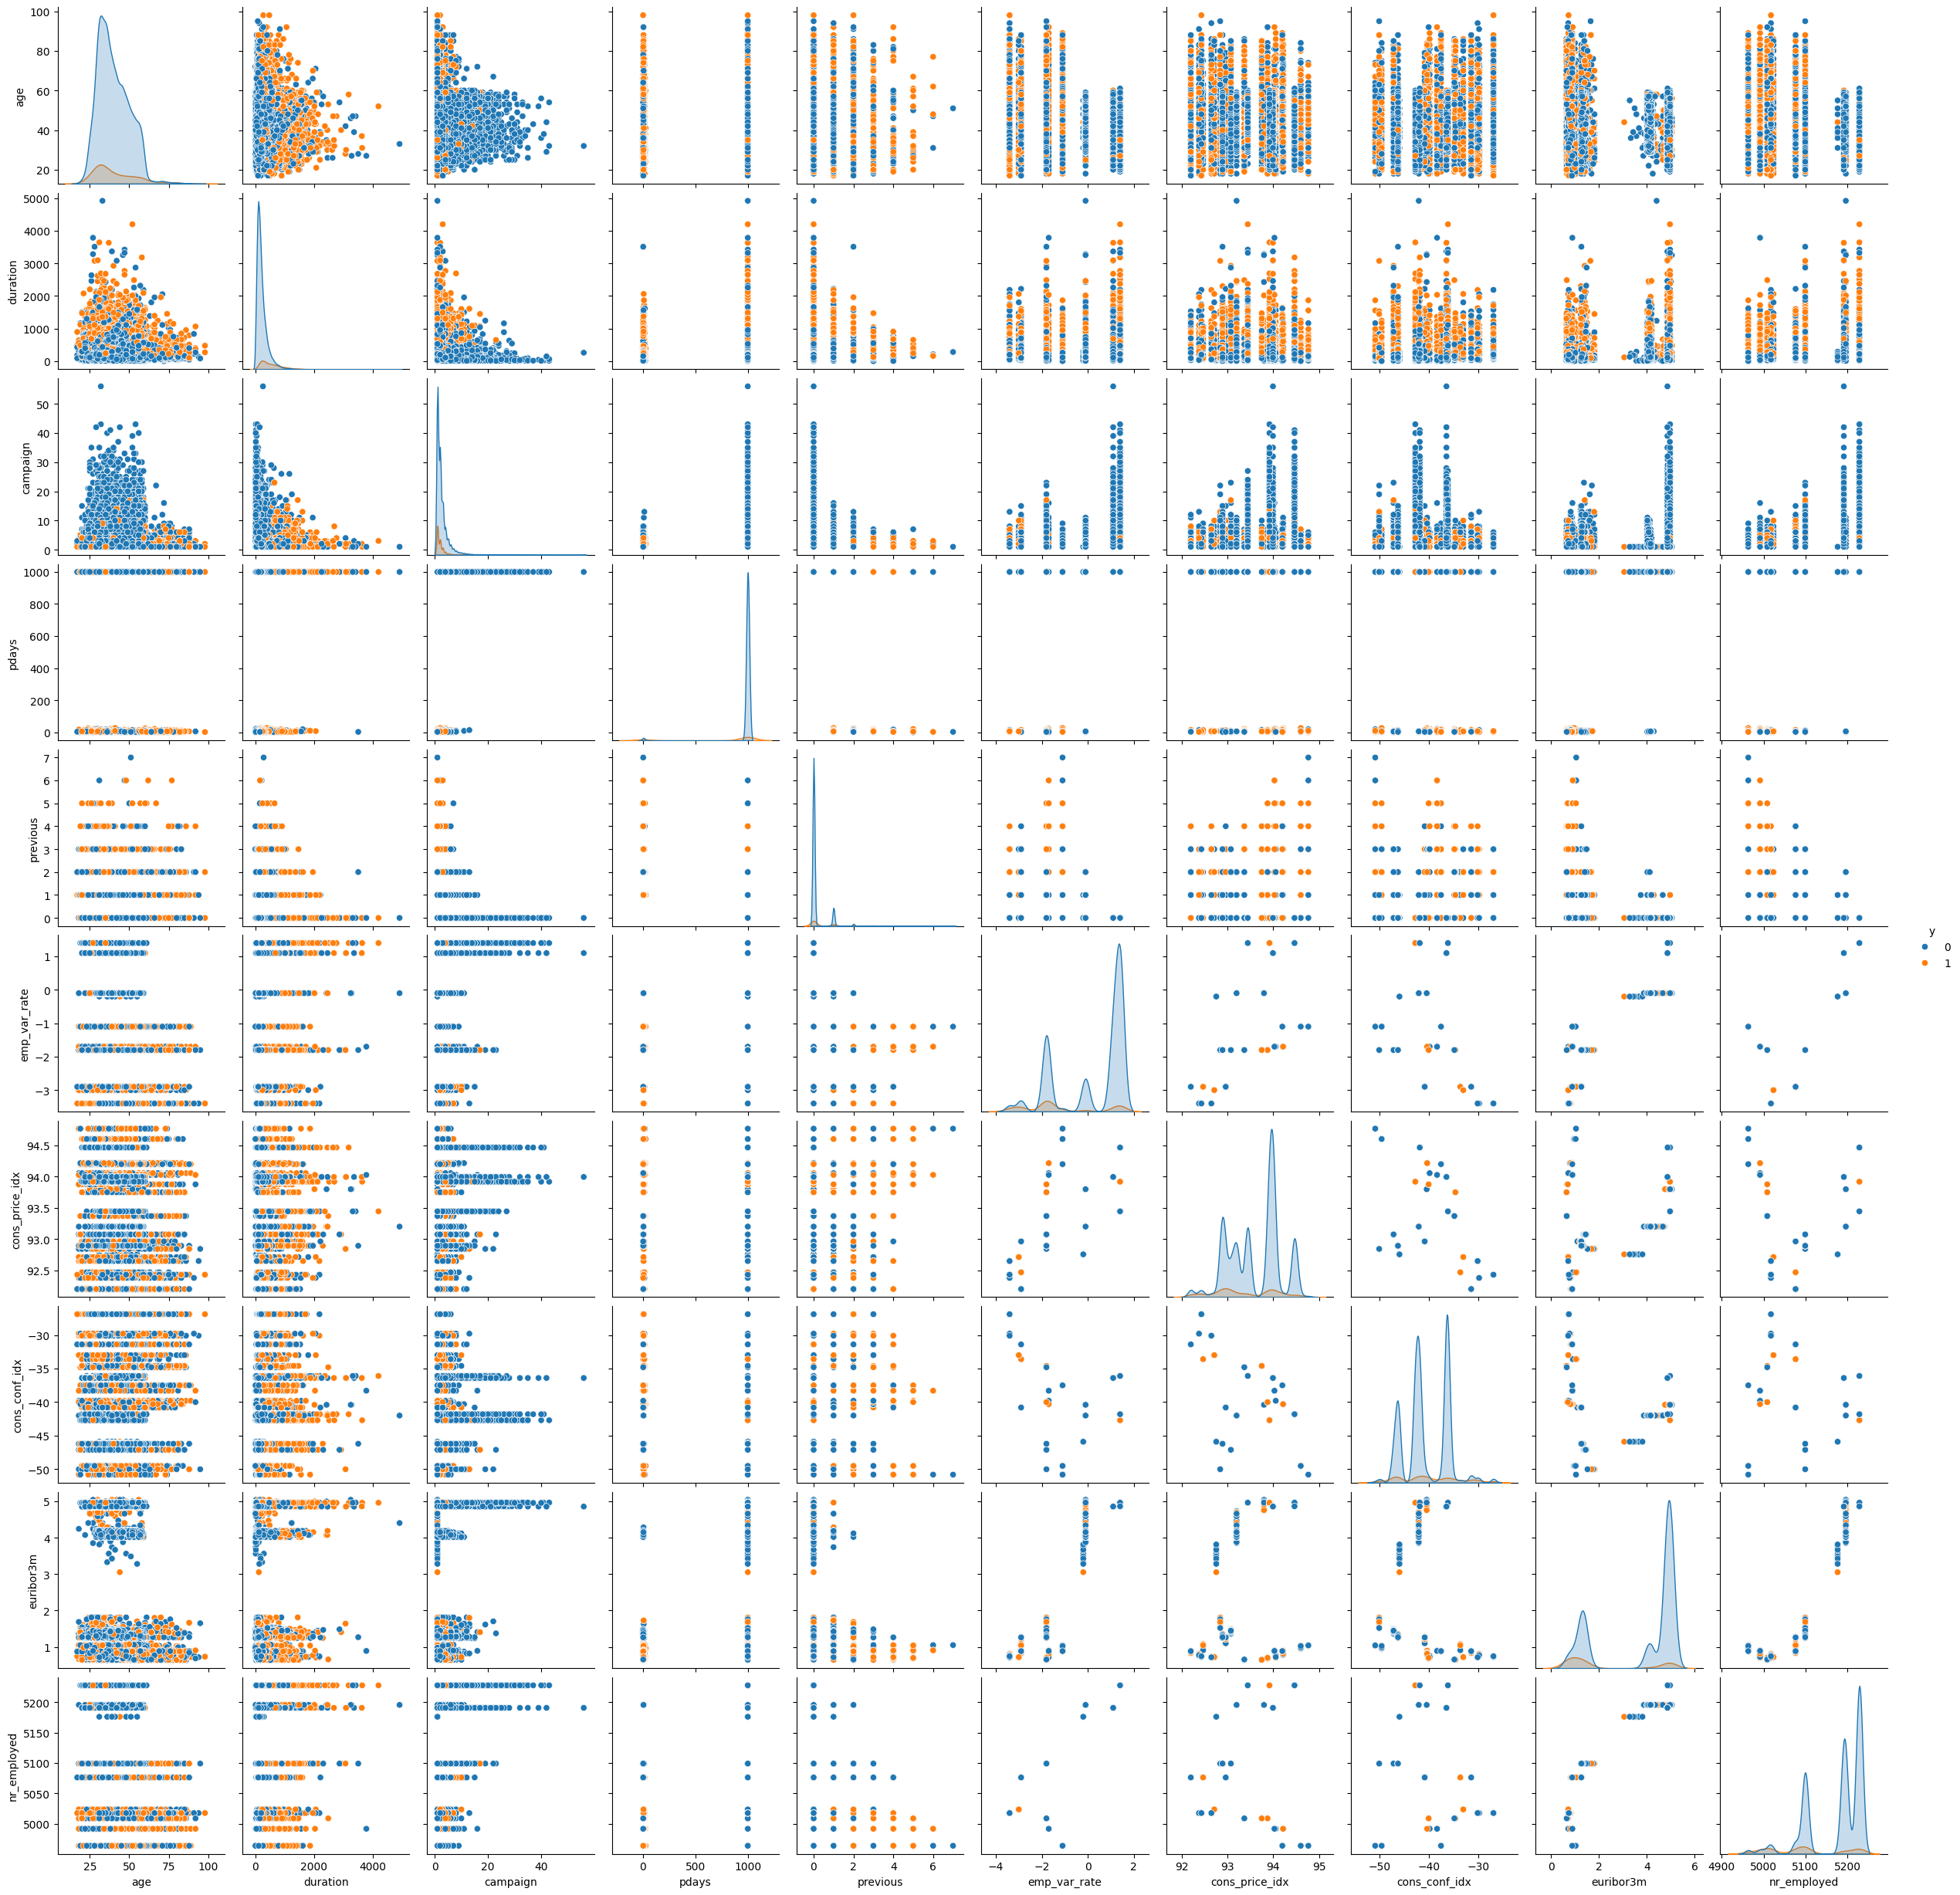

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='y')
plt.show()

## part2. 표본설계

In [25]:
################################
## (2) 표본크기 설정 (꼭 해야하는 작업은 아님)
## 표본추출 이유: 머신러닝 작업 시 훈련, 테스트 데이터를 나눌 때 사용
################################
import numpy as np

# Sample size calculation function based on the formula for a proportion
def calculate_sample_size(Z, p, E):
    """
    Z: Z-score for the desired confidence level (e.g., 1.96 for 95% confidence)
    p: estimated proportion (if unknown, set to 0.5 for maximum sample size)
    E: margin of error (e.g., 0.05 for 5% error margin)
    """
    n = (Z**2 * p * (1 - p)) / (E**2)
    return int(np.ceil(n))  # rounding up to ensure sufficient sample size

# Parameters
Z = 1.96  # Z-score for 95% confidence level
p = 0.5   # estimated proportion (unknown, so we assume maximum variance)
E = 0.05  # margin of error (5%)

# Calculate sample size
sample_size = calculate_sample_size(Z, p, E)
sample_size


385

In [ ]:
################################
## (3-1) 표본추출 - 무작위 추출
################################
sample = df.sample(n=sample_size, random_state=40)  
# random_state번호는 아무거나 설정해도 괜찮지만, 같은 번호로 설정하면 같은 결과가 나옴. 안쓰면 결과 항상 달라짐. 
# 그럼 좋은 샘플이 나오기도 하고, 나쁜 샘플이 나오기도 함.

# Displaying the first few rows of the sample to confirm
sample.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35734,32,student,married,professional.course,no,yes,no,cellular,aug,mon,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,0
2570,42,management,single,university.degree,no,yes,no,cellular,oct,mon,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.743,5017.5,1
23459,31,admin.,married,high.school,no,unknown,unknown,cellular,may,tue,...,6,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
40500,44,services,divorced,basic.9y,no,yes,no,telephone,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
9182,47,admin.,married,high.school,no,no,no,telephone,may,wed,...,11,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0


In [ ]:


value_counts_with_percentage(sample,'y')


   Count  Percentage (%)
y                       
0    333           86.49
1     52           13.51


In [ ]:
%pip install scikit-learn   # scikit-learn : 머신러닝(정형데이터) 라이브러리

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 31.8 MB/s eta 0:00:0031m32.7 MB/s eta 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
################################
## (3-2) 표본추출 - 층화추출
################################


# Stratified sampling based on 'y' variable
from sklearn.model_selection import train_test_split

# Performing stratified sampling based on 'y' column (target variable)
stratified_sample, _ = train_test_split(df, train_size=sample_size, stratify=df['y'], random_state=46)

##############################################
## (4) 표본의 대표성 확인
## 원본의 y=0, y=1 88.83%와 11.17%에 맞게 추출됨 - random_state를 바꿔도 88.83%와 11.17%에 맞게 추출됨.
## 즉, 표본이 원본의 대표성을 가지고 있음을 확인할 수 있음. 
###############################################


# Displaying the first few rows of the stratified sample
value_counts_with_percentage(stratified_sample,'y')

   Count  Percentage (%)
y                       
0    342           88.83
1     43           11.17


In [94]:
#######################################3
### (5) 표본데이터 준비
## 표본 데이터는 선택된 표본에 대해 변수별로 정리하여 추가 분석이 가능하도록 준비합니다.
## 예를 들어, 고객 특성과 예금 상품 가입 여부를 변수로 사용하여 표본 데이터를 정제하고 결측값이나 이상치를 확인합니다.

#######################################

# Step 1: Checking for missing values in the stratified sample
missing_values = stratified_sample.isnull().sum()

# Step 2: Summary statistics to check for outliers in numerical columns
numerical_summary = stratified_sample.describe()

# Displaying missing values and summary statistics for outlier detection
display(missing_values)
display(numerical_summary)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,39.851948,252.698701,2.376623,968.036364,0.166234,0.047273,93.606094,-40.558442,3.577026,5164.381558,0.111688
std,9.924265,231.573665,2.159276,172.855578,0.498333,1.613323,0.604393,4.784081,1.764445,73.827513,0.315392
min,20.000000,7.000000,1.000000,3.000000,0.000000,-3.400000,92.201000,-50.800000,0.643000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.365000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5191.000000,0.000000
75%,46.000000,327.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,80.000000,1488.000000,19.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000,1.000000


<Figure size 800x600 with 0 Axes>

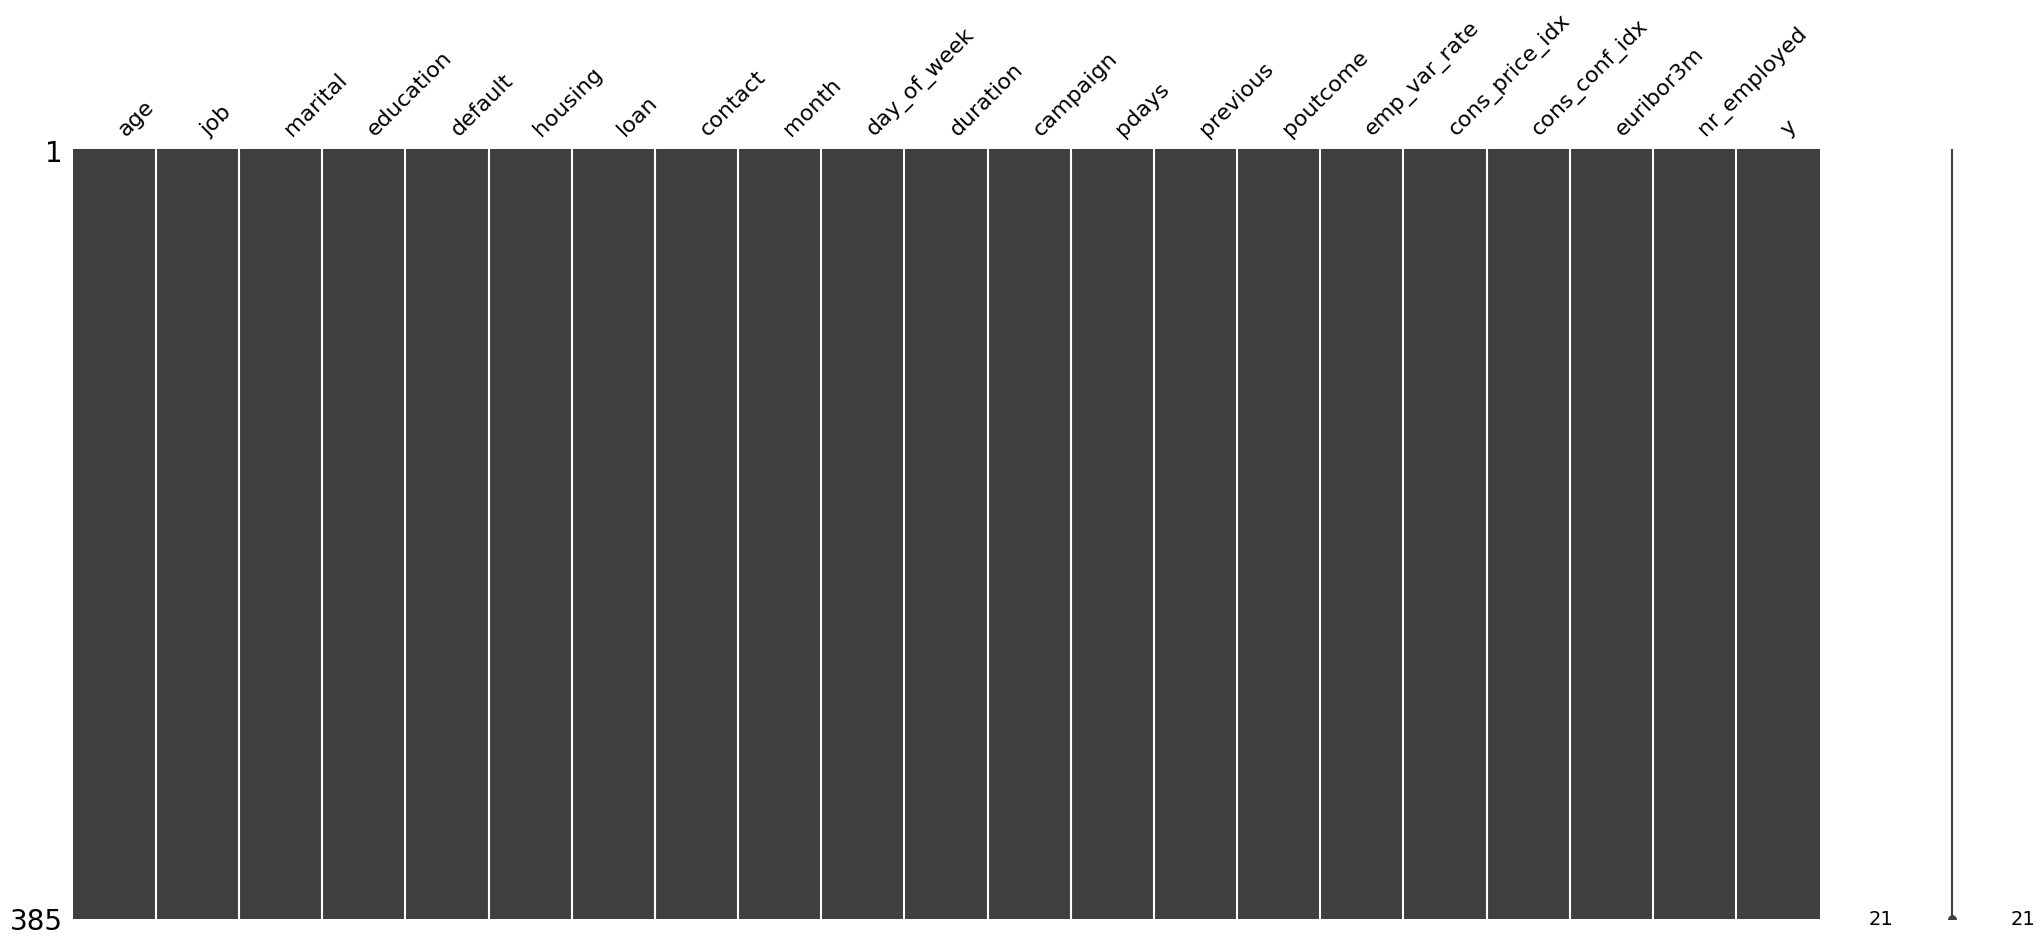

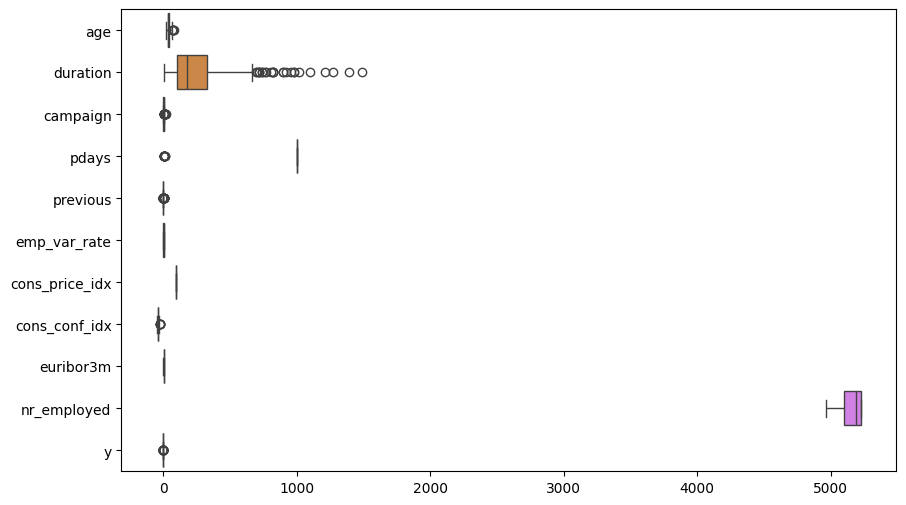

In [95]:
# 이상치는 IQR 사분위로, 결측치는 isnull()로 확인한다.
######################################
## 결측치 시각화
######################################

import missingno as msno
plt.figure(figsize=(8, 6))
msno.matrix(stratified_sample)  # 검정색만 나오면 이상치 없고, 노랑색같은 선 있으면 결측치 있음
plt.show()

######################################
## 이상치 시각화
######################################
plt.figure(figsize=(10, 6))
sns.boxplot(data=stratified_sample, orient='h')
plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.024590  0.002973 -0.033962 -0.016073   
duration        0.024590  1.000000 -0.150435 -0.020810  0.010161   
campaign        0.002973 -0.150435  1.000000  0.031228 -0.022033   
pdays          -0.033962 -0.020810  0.031228  1.000000 -0.510808   
previous       -0.016073  0.010161 -0.022033 -0.510808  1.000000   
emp_var_rate   -0.031473 -0.034505  0.168606  0.268828 -0.418901   
cons_price_idx -0.022643  0.005350  0.138922  0.084421 -0.208972   
cons_conf_idx   0.141998 -0.021307 -0.011981 -0.213048  0.027243   
euribor3m      -0.024398 -0.034507  0.152428  0.282230 -0.452277   
nr_employed    -0.060856 -0.044162  0.154076  0.390434 -0.510625   
y               0.032752  0.416207 -0.084871 -0.363682  0.229514   

                emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
age                -0.031473       -0.022643       0.141998  -0.024398   
duration           -0.034505       

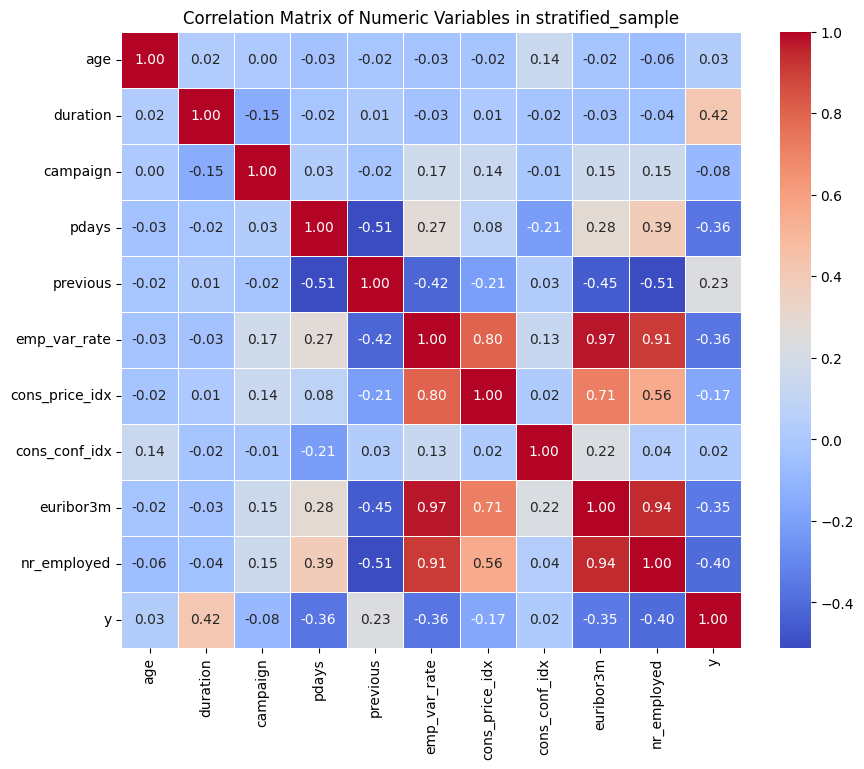

In [96]:
# stratified_sample 데이터프레임에서 숫자형 변수만 선택
numeric_data = stratified_sample.select_dtypes(include=['number'])

# 숫자형 변수들 간의 상관계수 계산
correlation_matrix = numeric_data.corr()

# 상관계수 출력
print(correlation_matrix)

# 상관계수 시각화 (히트맵)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables in stratified_sample")
plt.show()

In [97]:
######################################
### (6) 추론및 결과 해석
#####################################

# 상관분석
# Performing correlation analysis between 'y' (subscription) and various economic indicators
# Selecting numerical columns related to economic indicators
economic_indicators = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

# Calculating the correlation matrix between 'y' and these economic indicators
correlation_with_y = stratified_sample[economic_indicators + ['y']].corr()['y'].drop('y')

# Displaying the correlation values
correlation_with_y


emp_var_rate     -0.364054
cons_price_idx   -0.172149
cons_conf_idx     0.015901
euribor3m        -0.350377
nr_employed      -0.399719
Name: y, dtype: float64

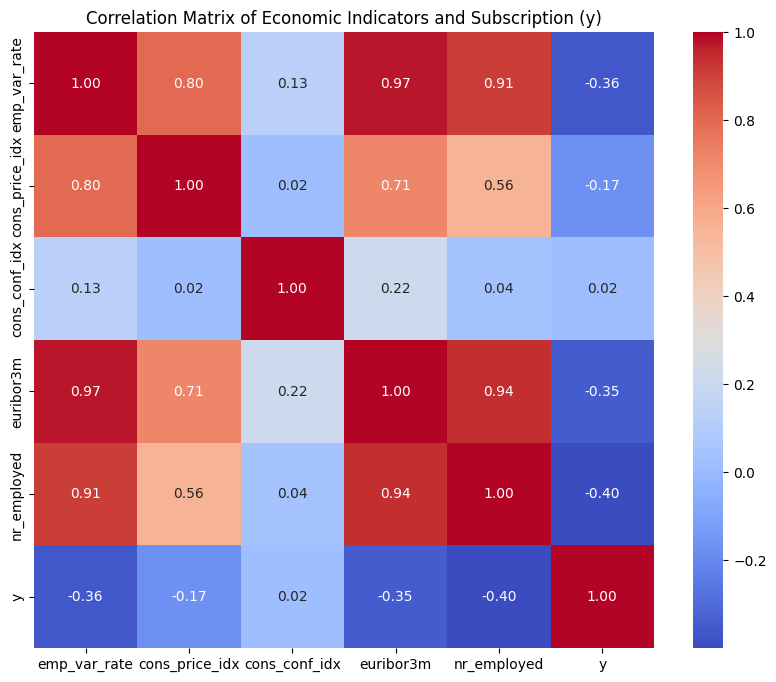

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix for the selected economic indicators and target variable 'y'
selected_columns = economic_indicators + ['y']
correlation_matrix = stratified_sample[selected_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Economic Indicators and Subscription (y)")
plt.show()


### 5. 정규성 검증
-- 표본의 개수가 2000개 이상이면 Kolmogorov-Smirnov test를, 2000개 이하이면 Shapiro-Wilk test(샤피로 윌크 검정)를 사용해도됨.

In [ ]:
from scipy.stats import shapiro
key_variables = ['age', 'campaign', 'duration', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


# Performing Shapiro-Wilk test for normality on key numerical variables
normality_tests = {var: shapiro(stratified_sample[var]) for var in key_variables}

# Displaying results
normality_tests


{'age': ShapiroResult(statistic=np.float64(0.9396724007100674), pvalue=np.float64(2.15653374714125e-11)),
 'campaign': ShapiroResult(statistic=np.float64(0.6441593585172469), pvalue=np.float64(1.5736116107234067e-27)),
 'duration': ShapiroResult(statistic=np.float64(0.6354550805000213), pvalue=np.float64(8.403844954412328e-28)),
 'emp_var_rate': ShapiroResult(statistic=np.float64(0.7875733664660363), pvalue=np.float64(4.719389950911402e-22)),
 'cons_price_idx': ShapiroResult(statistic=np.float64(0.9403398444701543), pvalue=np.float64(2.5759571121137574e-11)),
 'cons_conf_idx': ShapiroResult(statistic=np.float64(0.9317725494794709), pvalue=np.float64(2.8854492044685576e-12)),
 'euribor3m': ShapiroResult(statistic=np.float64(0.7133147014869972), pvalue=np.float64(3.7134818914076534e-25)),
 'nr_employed': ShapiroResult(statistic=np.float64(0.8008653364004061), pvalue=np.float64(2.0624003964306926e-21))}

### 6. 가설설정
### 7. 통계적 분석
### 8. 결과해석
![image.png](attachment:image.png)

In [ ]:
##############################################
## 비모수적 작업
##############################################
from scipy.stats import mannwhitneyu, chi2_contingency, kruskal

# 그룹을 예금 가입 여부('y')에 따라 분리
group_0 = stratified_sample[stratified_sample['y'] == 0]  # 미가입 그룹
group_1 = stratified_sample[stratified_sample['y'] == 1]  # 가입 그룹

# 1. 예금 가입 여부에 따른 연령과 캠페인 접촉 횟수의 차이 (Mann-Whitney U Test)
age_test = mannwhitneyu(group_0['age'], group_1['age'])
campaign_test = mannwhitneyu(group_0['campaign'], group_1['campaign'])

# 2. 주택 대출 여부와 예금 가입 여부의 관계 (Chi-square Test)
housing_contingency = pd.crosstab(stratified_sample['housing'], stratified_sample['y'])
housing_test = chi2_contingency(housing_contingency)

# 3. 여러 경제 지표에 따른 예금 가입 여부의 차이 (Kruskal-Wallis Test)
economic_indicators = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
kruskal_tests = {indicator: kruskal(group_0[indicator], group_1[indicator]) for indicator in economic_indicators}

# 결과 출력
results = {
    "Age Mann-Whitney U Test": age_test,
    "Campaign Mann-Whitney U Test": campaign_test,
    "Housing Chi-square Test": housing_test[:2],  # chi2 value and p-value
    "Economic Indicators Kruskal-Wallis Tests": kruskal_tests
}

results


{'Age Mann-Whitney U Test': MannwhitneyuResult(statistic=np.float64(6366.5), pvalue=np.float64(0.15143038993243083)),
 'Campaign Mann-Whitney U Test': MannwhitneyuResult(statistic=np.float64(8352.5), pvalue=np.float64(0.12817443906033243)),
 'Housing Chi-square Test': (np.float64(1.1369811592175165),
  np.float64(0.5663796988851562)),
 'Economic Indicators Kruskal-Wallis Tests': {'emp_var_rate': KruskalResult(statistic=np.float64(59.745774720409344), pvalue=np.float64(1.0793665313222734e-14)),
  'cons_price_idx': KruskalResult(statistic=np.float64(27.20659150835112), pvalue=np.float64(1.8283427336709923e-07)),
  'cons_conf_idx': KruskalResult(statistic=np.float64(17.02818199728531), pvalue=np.float64(3.6829113941550364e-05)),
  'euribor3m': KruskalResult(statistic=np.float64(62.02915975778243), pvalue=np.float64(3.3840888563354243e-15)),
  'nr_employed': KruskalResult(statistic=np.float64(67.84508151390078), pvalue=np.float64(1.7685920575199452e-16))}}

### 참고: 정규분포일때
![image.png](attachment:image.png)

In [ ]:
#######################################################
### (참고) 정규분포
######################################################

from scipy.stats import ttest_ind, chi2_contingency, pearsonr

# Hypothesis testing functions
# 1. Testing the impact of age on subscription (T-test)
age_ttest = ttest_ind(group_0['age'], group_1['age'], equal_var=False)

# 2. Testing if job category affects subscription rate (Chi-square test)
job_contingency = pd.crosstab(stratified_sample['job'], stratified_sample['y'])
chi2_test_job = chi2_contingency(job_contingency)

# 3. Testing if housing loan impacts subscription (Chi-square test)
housing_contingency = pd.crosstab(stratified_sample['housing'], stratified_sample['y'])
chi2_test_housing = chi2_contingency(housing_contingency)

# 4. Testing economic indicators' impact on subscription (Correlation tests)
correlation_results = {
    "emp_var_rate": pearsonr(stratified_sample['emp_var_rate'], stratified_sample['y']),
    "cons_price_idx": pearsonr(stratified_sample['cons_price_idx'], stratified_sample['y']),
    "cons_conf_idx": pearsonr(stratified_sample['cons_conf_idx'], stratified_sample['y']),
    "euribor3m": pearsonr(stratified_sample['euribor3m'], stratified_sample['y']),
    "nr_employed": pearsonr(stratified_sample['nr_employed'], stratified_sample['y'])
}

# 5. Testing if campaign variables impact subscription
# T-test for campaign (number of contacts) and duration (call duration) variables
campaign_ttest = ttest_ind(group_0['campaign'], group_1['campaign'], equal_var=False)
duration_ttest = ttest_ind(group_0['duration'], group_1['duration'], equal_var=False)

# Displaying test results
results = {
    "Age T-test": age_ttest,
    "Job Chi-square Test": chi2_test_job[:2],  # chi-square and p-value
    "Housing Chi-square Test": chi2_test_housing[:2],  # chi-square and p-value
    "Economic Indicators Correlation": correlation_results,
    "Campaign T-test": campaign_ttest,
    "Duration T-test": duration_ttest
}

results


{'Age T-test': TtestResult(statistic=np.float64(-1.8317028018712855), pvalue=np.float64(0.07341265626302346), df=np.float64(46.44963612931152)),
 'Job Chi-square Test': (np.float64(24.531773254795034),
  np.float64(0.010668373796690373)),
 'Housing Chi-square Test': (np.float64(1.1369811592175165),
  np.float64(0.5663796988851562)),
 'Economic Indicators Correlation': {'emp_var_rate': PearsonRResult(statistic=np.float64(-0.4503869448133966), pvalue=np.float64(1.2509277327239118e-20)),
  'cons_price_idx': PearsonRResult(statistic=np.float64(-0.27787532450111097), pvalue=np.float64(2.9540220740970353e-08)),
  'cons_conf_idx': PearsonRResult(statistic=np.float64(0.23766606927266304), pvalue=np.float64(2.406175768139717e-06)),
  'euribor3m': PearsonRResult(statistic=np.float64(-0.44168129239967535), pvalue=np.float64(8.162310077273811e-20)),
  'nr_employed': PearsonRResult(statistic=np.float64(-0.484456195819393), pvalue=np.float64(4.733804554454574e-24))},
 'Campaign T-test': TtestResult(

In [ ]:
from scipy.stats import shapiro
key_variables = ['age', 'campaign', 'duration', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


# Performing Shapiro-Wilk test for normality on key numerical variables
normality_tests = {var: shapiro(stratified_sample[var]) for var in key_variables}

# Displaying results
normality_tests


{'age': ShapiroResult(statistic=np.float64(0.9396724007100674), pvalue=np.float64(2.15653374714125e-11)),
 'campaign': ShapiroResult(statistic=np.float64(0.6441593585172469), pvalue=np.float64(1.5736116107234067e-27)),
 'duration': ShapiroResult(statistic=np.float64(0.6354550805000213), pvalue=np.float64(8.403844954412328e-28)),
 'emp_var_rate': ShapiroResult(statistic=np.float64(0.7875733664660363), pvalue=np.float64(4.719389950911402e-22)),
 'cons_price_idx': ShapiroResult(statistic=np.float64(0.9403398444701543), pvalue=np.float64(2.5759571121137574e-11)),
 'cons_conf_idx': ShapiroResult(statistic=np.float64(0.9317725494794709), pvalue=np.float64(2.8854492044685576e-12)),
 'euribor3m': ShapiroResult(statistic=np.float64(0.7133147014869972), pvalue=np.float64(3.7134818914076534e-25)),
 'nr_employed': ShapiroResult(statistic=np.float64(0.8008653364004061), pvalue=np.float64(2.0624003964306926e-21))}